In [18]:
import pandas as pd
import numpy as np
import pickle
from IPython.display import Image

# Deployment 




# To pick the bets clients

Classification model(s) that given 

- loan amount
- term 
- past records
- income and outcome 
- delienquency records previous to account openning 

were applied to predicts if the loan requested would be or not paid back. To obtain feed such models, 
we had to focus on clients for which these features can be infered from 
codebooks. See data_preparation.ipynb for details.

IMPORTANT: I did not used the good/bad boolean class anywhere, included in users_id.csv.

### Evaluation Metric

In order to minimize losses (false positive) our modesl are evaluated with the 'precision' metric, whose high score indicates few false positives. In our training and test sets 30 % of loans records were delinquent. 

Future work should be focus on how to maximixe profits while keeping this precision. 

The precision achieved by our models are:

In [19]:
pd.read_csv('./plots_tables/test_set_scores.csv', index_col = 0)

,Model,Cross-validation set precision score,Cross-validation std,Test set precision score
0,K_Nearest_Neighbour,0.903034,0.011705,0.931330
1,blended,0.897466,0.004884,0.910781
2,XGBoost,0.904422,0.003665,0.906367
3,Random_Forest,0.897872,0.003632,0.904412
4,Gradient_Boosting,0.905802,0.006588,0.901515
5,Bagging_Classifier,0.878798,0.005530,0.889734
6,Extra_Trees,0.874488,0.006986,0.889286
7,AdaBoost,0.889859,0.006729,0.886861
8,SVC,0.876788,0.008946,0.882784
9,Gaussian_Process,0.845644,0.003902,0.863014


Some algorithms allows us to infer the most important features to predict if a given loan will be payed back (see modeling.ipynb for details). The next table shows such results:

In [28]:
pd.read_csv('./plots_tables/feature_importance.csv', index_col = 0)

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,loan_amount,0.444240,0.178237,0.254905,0.177223,0.20,0.250921
1,ratio_outcome_income,0.077603,0.076709,0.073451,0.069862,0.40,0.139525
2,total_credit_payments,0.069247,0.083232,0.072273,0.076692,0.06,0.072289
3,loan_term,0.083512,0.089134,0.079947,0.083569,0.00,0.067232
4,monthly_outcome,0.063037,0.107628,0.067695,0.079256,0.00,0.063523
5,monthly_income,0.028480,0.097577,0.067143,0.056489,0.02,0.053938
6,log_outcome,0.047156,0.000000,0.063498,0.086159,0.06,0.051363
7,sqrt_outcome,0.076085,0.000000,0.076292,0.062314,0.04,0.050938
8,worst_previous_fraction,0.015857,0.074836,0.032452,0.034419,0.06,0.043513
9,worst_previous_delinquency,0.006539,0.057380,0.026916,0.040448,0.08,0.042257


Some of our models exhibit a variance problems, detected through learning curves. The curves of models with the lowest variance are:

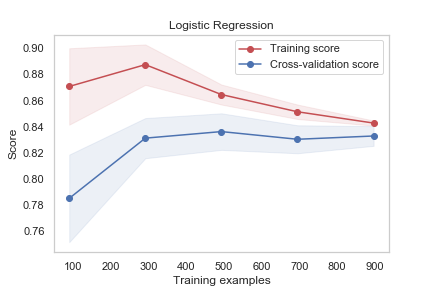

In [21]:
Image(filename = './plots_tables/Logistic_Regression.png')

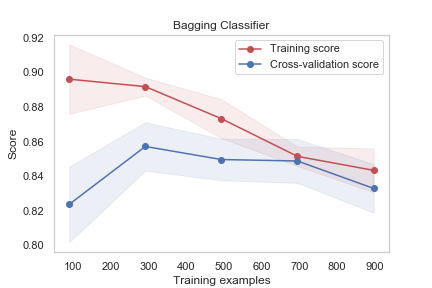

In [22]:
Image(filename = './plots_tables/Bagging_Classifier.png') 

# Question 2: Propose an amount and term

If a new client applies for a loan with the following features

In [23]:
blended_model = pickle.load(open('./trained_models/Bagging_Classifier', 'rb')) #load trained model
scaler = pickle.load(open('./scaler/scaler', 'rb'))
client = pd.read_csv('./dataset/client.csv', index_col = 0)

client

,user_id,monthly_income,monthly_outcome,total_credit_payments,payments_per_year,loan_term,loan_amount,worst_previous_delinquency,worst_previous_fraction,ratio_outcome_income,sqrt_income,sqrt_outcome,log_outcome,_will_pay_predicted
69,14128,2011464.0,547658.0,24.0,24.0,1.0,12000.0,0.0,0.0,3.672847,1418.260907,740.039188,13.213406,0


we can accept of reject a loan based on our classificatioin models. If he does not pass, we could actually offer him a different loan amount/term, such that our classification predicts that he will pay:

In [24]:
for i in range(1,9):
    client.at[69,'loan_amount'] = 10**i
    cl = scaler.transform(client.drop(columns = ['user_id','_will_pay_predicted']))
    decision=blended_model.predict(cl)
    print('loan_ammount:', 10**i, ' _will_pay_prediction',decision)

loan_ammount: 10  _will_pay_prediction [0]
loan_ammount: 100  _will_pay_prediction [0]
loan_ammount: 1000  _will_pay_prediction [1]
loan_ammount: 10000  _will_pay_prediction [0]
loan_ammount: 100000  _will_pay_prediction [0]
loan_ammount: 1000000  _will_pay_prediction [0]
loan_ammount: 10000000  _will_pay_prediction [0]
loan_ammount: 100000000  _will_pay_prediction [0]


In [25]:
for i in range(1,5):
    client.at[69,'loan_amount'] = 10**4
    client.at[69,'loan_term'] = i/20
    cl = scaler.transform(client.drop(columns = ['user_id','_will_pay_predicted']))
    decision=blended_model.predict(cl)
    print('loan_term in', i*5, 'years _will_pay_prediction',decision)

loan_term in 5 years _will_pay_prediction [0]
loan_term in 10 years _will_pay_prediction [0]
loan_term in 15 years _will_pay_prediction [0]
loan_term in 20 years _will_pay_prediction [0]


# Question 3: Interest rate

Using the test set, loan losses can be estimated, i.e. money lost due to misclassifying untrustworthy clients as trustworthy.

In [26]:
# With the test set, 

report=pd.read_csv('./dataset/interest.csv')

losses_condition= (report['_will_pay_predicted']==1) & (report['did_pay']==0)
paid_back_condition= (report['_will_pay_predicted']==1) & (report['did_pay']==1)

losses = report[losses_condition]['loan_amount'].sum()
paid_back = report[paid_back_condition]['loan_amount'].sum()

 Finally, based on this we can calculate a total interest in order to make the test set of clients profitable:
 
 paid_back = loan_WihoutInterest  (1 + interest_{rate})

 loan_{WihoutInterest} * interest_{rate} > losses 

In [27]:
mininum_interest_rate=(paid_back / losses -1 )**(-1)  *100

print("""
Therefore, the total interesst rate we need in order to profit is: 
""",mininum_interest_rate, '%')


Therefore, the total interesst rate we need in order to profit is: 
 5.303309570812077 %


The anual interest rate, just need to be pay informly during the loan term.

# Conclusions and discussion

Not being an expert on finances, my approach to make this study case profitable was to minimize losses, as oppose to maximize gains. To this end, I trained several popular (Log/decision-trees/SVC/Bayes/KNN, not deep learning given the size of the datasets) classification models that, given an user {past loan records, monthly income/outcome, requested loan ammount and term}, can predict if the loan will be paid back in its entirety. In all cases we obtained a prediction presicion above 85%.

The data mining consisted in understanding and filtering the records of users for which losses and terms can be estimated. Which then were used to train our model. Additionally, many clients were neglected because their records had feature values that contradict each other. Our complete training/test sets were reduced to 1497 records.

The features that impact the most whether or not a loan will be paay back are: loan amount and outcome/income ratio. 

Loan money lost/paidback were estimated by applying the modelts to the data test set. Based on this, the interest rate needed to make profits can be determined. For the bagging model, which does not have a variance problem, we estimated that a total interest of 5.30 % has to added to the amount requested by clients. This is fixed over time.

Many important improvents are feasable with the tools developed, e.g.

- Spliting the datasets further into middle class and more wealth. 
- Create/test additional features
- Better understanding of the role of each feature
- Increase recall score

However, on the big picture the critial point from the business perspective, would be to get larger test datasets as to estimate losses and its variances accurately. In addition, we shall compare these with the expectation values/variances obtained directly from our theoretical models to thoroughly evaluate these. 

Finally, it is worth mentioning the role of external factors, such as economic fluctuations, are only indirectly included through our records. Future work should address how to include such risk into the interest rate. 